In [1]:
import folium
import geopandas
import json
import requests
import pandas as pd


In [2]:
iw_map = folium.Map(location=[48.7, 2.3], zoom_start=9)
gdf = geopandas.read_file('departements.geojson')

folium.GeoJson(gdf).add_to(iw_map)
folium.LayerControl().add_to(iw_map)
iw_map

In [3]:
url_long="https://dgal.opendatasoft.com/api/records/1.0/search/?dataset=export_alimconfiance&q=&facet=libelle_commune&facet=date_inspection&facet=app_libelle_activite_etablissement&facet=synthese_eval_sanit&facet=filtre&facet=ods_type_activite"
url = "https://dgal.opendatasoft.com/api/records/1.0/search/?dataset=export_alimconfiance&q=&rows=0&facet=code_postal"



params1 = dict(
    dataset='export_alimconfiance',
    facet='libelle_commune',
)

params2 = dict(
    dataset='export_alimconfiance',
    facet=['libelle_commune',
   'date_inspection',
   'app_libelle_activite_etablissement',
   'synthese_eval_sanit',
   'filtre',
   'ods_type_activite']
)

#resp = requests.get(url=url, params=params2)
resp = requests.get(url=url)
data = resp.json() # Check the JSON Response Content documentation below

In [4]:
data["facet_groups"][0]['facets'][0:10]

[{'name': '75015', 'count': 568, 'state': 'displayed', 'path': '75015'},
 {'name': '75018', 'count': 526, 'state': 'displayed', 'path': '75018'},
 {'name': '75012', 'count': 447, 'state': 'displayed', 'path': '75012'},
 {'name': '75019', 'count': 436, 'state': 'displayed', 'path': '75019'},
 {'name': '75011', 'count': 430, 'state': 'displayed', 'path': '75011'},
 {'name': '75013', 'count': 413, 'state': 'displayed', 'path': '75013'},
 {'name': '75008', 'count': 376, 'state': 'displayed', 'path': '75008'},
 {'name': '75006', 'count': 363, 'state': 'displayed', 'path': '75006'},
 {'name': '75017', 'count': 339, 'state': 'displayed', 'path': '75017'},
 {'name': '75020', 'count': 325, 'state': 'displayed', 'path': '75020'}]

In [5]:
dept = [ (row['name'], row['name'][0:2], row['count']) for row in data["facet_groups"][0]['facets'] ]

In [6]:
dept=pd.DataFrame(dept)
dept

,0,1,2
0,75015,75,568
1,75018,75,526
2,75012,75,447
3,75019,75,436
4,75011,75,430
...,...,...,...
95,93600,93,33
96,94120,94,33
97,22400,22,32
98,63000,63,32


In [7]:
deptCount=dept.groupby(1)[2].sum()
deptCount

1
02      37
05      56
07      40
11      35
13      88
14      33
17      51
22      32
24     142
25      36
33      43
34     110
35      45
42      90
50      36
51      51
54      55
55      41
56     204
57      52
59      47
60      82
61     156
62      77
63      32
66      68
68     108
69     596
72      42
74      41
75    6112
76      40
78      32
79      43
80      62
84     122
85      37
87      36
92     206
93     249
94     389
97     156
98      44
Name: 2, dtype: int64

<AxesSubplot:xlabel='1'>

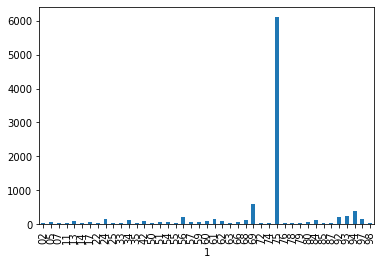

In [8]:
deptCount.plot.bar()

In [9]:
dept[2].sum()

10054

In [10]:
dept.shape

(100, 3)

In [15]:
import random

def random_html_color():
    r = random.randint(0,256)
    g = random.randint(0,256)
    b = random.randint(0,256)
    return '#%02x%02x%02x' % (r, g, b)

iw_map2 = folium.Map(location=[48.7, 2.3], zoom_start=7, tiles="Stamen Terrain")

def style_fcn(x):
    return { 'fillColor': random_html_color() }

def style_fcn2(feature):
    employed = employed_series.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed),
    }

folium.GeoJson(gdf, style_function=style_fcn).add_to(iw_map2)

iw_map2

In [13]:
random_html_color()

'#7ad188'

In [12]:

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        "fillColor": "#ffff00",
        "color": "black",
        "weight": 2,
        "dashArray": "5, 5",
    },
).add_to(iw_map)

NameError: name 'geo_json_data' is not defined